<a href="https://colab.research.google.com/github/jvperea/atom/blob/master/ADASS2019_part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<img src="https://docs.google.com/uc?export=download&id=1qObOQ2sNwn9_PvMbr_ztrg_0jvKltwip" alt="introduction to artificial neural networks">

![https://creativecommons.org/licenses/by-nc-sa/4.0/](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png "https://creativecommons.org/licenses/by-nc-sa/4.0/")
</center>

<font size=1>
presented by Kai Polsterer and Nikos Gianniotis, HITS gGmbH at ADASS XXIX in Groningen, the Netherlands. Not taking responsibility for anything including proper functionality and content of links. Not to be tweeted about by Kirk Borne or science kardashians! https://en.wikipedia.org/wiki/Kardashian_Index
</font>

---
#Recap of last ADASS

<font size=4>

During the last ADASS, in the **Beginners Guide to Machine Learning**, we heard about the basics of machine learning. Key topics we spoke about included:

* classification with reference data / how to learn from data
* evaluation of performance / what does performance mean
* validation of results / does the model generalize well
* unbalanced data sets / what does 99% correct mean when 99% are of class A
* regression with reference data / predicting values instead of class labels
* nearest neighbours, decision trees / partitioning the feature space
* ensemble methods, random forest / combining weak learners
* feature selection / an example of scientific use
* **neural networks** / we just started our journey

We learned that machine learning is **the quest of finding a good predictive model**. Today we want to understand artificial neural networks to be able to write our own models from scratch. In the end, you will understand that artificial inteligence is currently a favoured approach for training models, but that a dystropic future with killing robots is still far away.<br><br>


<font size=2><center>
<table><tr><td>related information</td></tr>
<tr><td>

[adass2018.astro.umd.edu/bof.html](http://adass2018.astro.umd.edu/bof.html)

[tinyurl.com/bg2mlBoF](https://tinyurl.com/bg2mlBoF)

</td></tr></table>
</center></font>

---
# Overview

<font size=4>

This tutorial is an extension to the activities of previous ADASS meetings, which aimed for providing an overview of different aspects of machine learning. 
This is a hands on introduction to neural networks.  
The participant will be exposed to the basic principles underlying artificial neural networks. To do so, we will start from very simple models, show relevant equations and how to code these equations in ``python``.
We will attempt to provide an overview of key concepts in order to facilitate the interested paricipants in their self study. <br><br>

  

This tutorial is presented in an interactive format. Similar to ”Beginners guide to machine learning”
a ``jupyter`` notebook is provided that participants can use during or after the session to reproduce any subset of the presented material. <br><br>
  
  
<font size=5>

- [Part A](https://colab.research.google.com/drive/1oZC3NMMnphThodpyw0GdLMVqFIzrtpHr): **from simple lines to neurons**
- [Part B](https://colab.research.google.com/drive/1hIaFKr5At02wUaFHNQpDn0HuhaIE-F6s): from simple neurons to more complex architectures
- [Part C](https://colab.research.google.com/drive/1MwgeXxaezdpUYbgEMi00oNzch7Paz7Ou): from complex architectures to deep convolutional networks
- [Part D](https://colab.research.google.com/drive/1GmSDz9SKT82ZFGKL6DNbCWPCdMNSZN6E): summary



### Let us setup various things that we will need for this sesssion.

In [0]:
# whatever general tools are necessary; 
# specific things are introduces in the relevant cells
import numpy
import matplotlib.pyplot as pyplot

numpy.random.seed(12347) # initialize random number generator

#From simple lines to neurons

---
##Fitting a straight line

<font size=4>
We start with the most basic building block.
Given pairs of data items <font color=#bb0000>$(x\in R, y \in R)$</font>, we want to fit a line. This means, to find the line (of all possible lines) that is the closest to the given  data.<br>

###Defining a model
<font size=4>
A line is defined as:<br>
<font color=#bb0000>$y = \alpha x + \beta$</font>

We use  notation that is more typical in the  machine learning setting:<br>

<font color=#bb0000>$f(x;w_0,w_1) = w_1 x + w_0$</font><br><br>

The linear model translates into the following code:

In [0]:
def linear_model(x, w0, w1):
  return x*w1 + w0

###Generating synthetic data
<font size=4>
Let's randomly generate some data for <font color=#bb0000>$x$</font> and <font color=#bb0000>$y$</font> using our linear model and plot them.

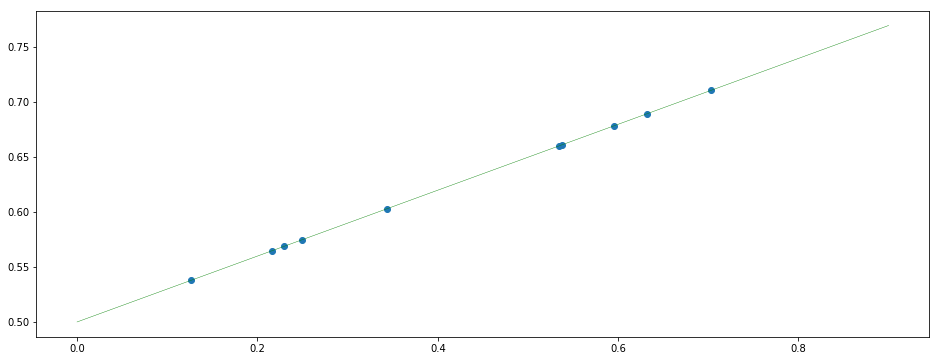

In [0]:
alpha = 0.3
beta = 0.5

x = numpy.random.uniform(size = 10) # generate 10 values between 0 and 1
y = linear_model(x, beta, alpha)

xvals = numpy.arange(0,1,1/10)
pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, linear_model(xvals, beta, alpha), c='g', lw=0.4)
pyplot.scatter(x,y)
pyplot.show()

<font size=4>
Typically measured data are noisy, so we simulate this by adding some noise to the data.

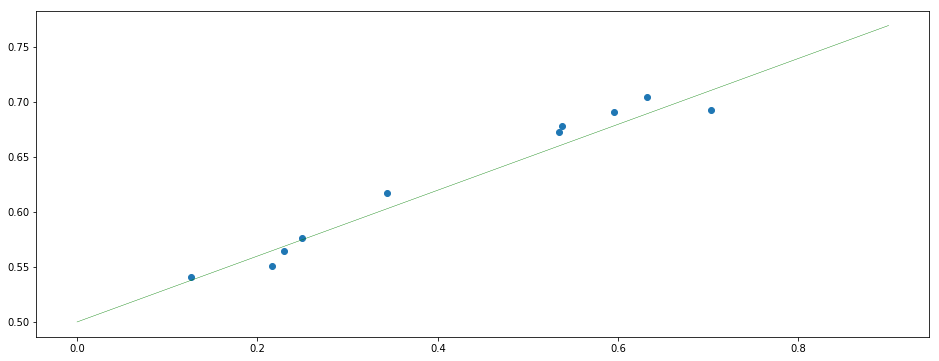

In [0]:
y = y + numpy.random.normal(loc=0.0, scale=0.01, size=x.shape[0]) # add some additional noise with a sigma of 0.01

pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, linear_model(xvals, beta, alpha), c='g', lw=0.4)
pyplot.scatter(x,y)
pyplot.show()

###Defining an error function
<font size=4>
Our model is a function that describes a line.
Fitting a line means, finding the <font color=#bb0000>$w_0$</font> and <font color=#bb0000>$w_1$</font> parameters that give us the <font color=#bb0000>$f(x;w_0,w_1)$</font> closest to the observed data.<br><br>

But what does closest mean? Let's define closeness as the error function:

<font color=#bb0000>$e(w_0,w_1) = \sum_{n=1}^N \|f(x_n;w_0,w_1) - y_n\|^2$</font><br><br>

This translates directly into:

In [0]:
# Implements squared-error objective e(w0,w1) to be minimised
def error_of_linear_model(x, y, param):

  # unpacking of parameters
  w0 = param[0]
  w1 = param[1]

  # there are N data items
  N = x.shape[0]

  # get predictions from model
  predictions = numpy.zeros((N))
  for n in range(N):
    predictions[n] = linear_model(x[n], w0, w1)

  # calculate discrepancy
  error = 0.0
  for n in range(N):
    error = error + (predictions[n] - y[n])**2

  # return error to be minimised
  return error

# compact alternative to the method above
# def error_of_linear_model(x, y, param):
#   return numpy.sum(numpy.square(linear_model(x, param[0], param[1])-y))

<font size=4>We can use the error function to easily determine which parameter values produce a line closer to the data, i.e. that fits the data better. The smaller the error, the better the fit:

In [0]:
print (error_of_linear_model(x, y, [0.55, 0.35]))
print (error_of_linear_model(x, y, [beta, alpha]))

0.04646981115653519
0.001610721736752789


###Minimizing the objective function by using the gradient
<font size=4>
The introduced error function is the objective function we want to minimise with respect to parameters <font color=#bb0000>$w_0$</font> and <font color=#bb0000>$w_1$</font>. This is actually a least-squares problem and has a closed form solution.<br><br>

However: in anticipation of more complex models that we will introduce later, we solve the problem using gradient based optimisation.

Gradient based optimisation improves the model fit incrementally:
* It calculates the gradient <font color=#bb0000>$\nabla e(w_0, w_1)$</font> of the objective function wrt <font color=#bb0000>$w_0$</font> and <font color=#bb0000>$w_1$</font>.

* The calculated gradient tells us how to update the current values of parameters
<font color=#bb0000>$w_0$</font> and <font color=#bb0000>$w_1$</font> in order to incrementally improve the model fit.
  
* Repeatedly updating the parameters values, should lead us to the minimum of the objective function <font color=#bb0000>$e(w_0, w_1)$</font>.

This can be intuitively illustrated by the following figure.</font>

<figure><center>
    <img src="https://docs.google.com/uc?export=download&id=1SScx3PXbwqh5dsevGMYeVU_ttSKThjTi" alt="Gradient Descent"></center>
    <figcaption><b>Figure 1</b>: The figure shows the 2D plot of the objective function $e(w_0, w_1)$ which we wish to minimise. The red arrows show the direction of the <b>negative</b> gradient. Gradient points towards higher values  of the objective function, while <b>negative</b> gradient points towards lower values. Following the <b>negative</b> gradient leads us to the minimum of $e(w_0, w_1)$ and best solution for $w_0, w_1$.</figcaption>
</figure>

<font size=4>The gradient of <font color=#bb0000>$e(w_0, w_1)$</font> wrt <font color=#bb0000>$w_0, w_1$</font> reads:

<font color=#bb0000>$\nabla e(w_0, w_1) = \begin{bmatrix} 2(f(x_n;w_0,w_1) -y_n) \\ 2(f(x_n;w_0,w_1) -y_n)x_n \end{bmatrix}$</font> <br><br>
<font size=2><center>
<table><tr><td>related information</td></tr>
<tr><td>

[https://en.wikipedia.org/wiki/Gradient](https://en.wikipedia.org/wiki/Gradient)

[https://en.wikipedia.org/wiki/Gradient_descent](https://en.wikipedia.org/wiki/Gradient_descent)

[https://www.wolframalpha.com/](https://www.wolframalpha.com/widgets/view.jsp?id=5d20575fa6cbe9d1e5a046aeef36e7a3)

</td></tr></table>
</center></font>

We code the gradient as follows:

In [0]:
# Implements gradient of squared-error objective
def calculate_gradient_for_linear_model(x, y, param):

  # unpacking of parameters
  w0 = param[0]
  w1 = param[1]

  # there are N data items
  N = x.shape[0]

  # calculate gradient
  gradient = numpy.zeros((2))
  for n in range(N):
    prediction  = linear_model(x[n], w0, w1)
    gradient[0] = gradient[0] + 2.0*(prediction - y[n])*1.0
    gradient[1] = gradient[1] + 2.0*(prediction - y[n])*x[n]

  # return gradient
  return gradient

# compact alternative to the method above
# def calculate_gradient_for_linear_model(x, y, param):
#   return numpy.sum(2*(linear_model(x, param[0], param[1])-y)), numpy.sum(2*(linear_model(x, param[0], param[1])-y)*x)

<font size=4>This allows us to calculate the gradient for a given set of parameters and plot the result.

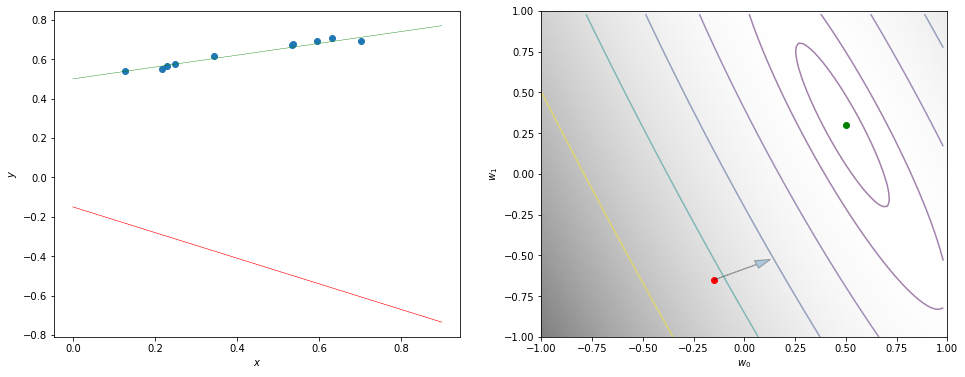

In [0]:
errors = numpy.array([error_of_linear_model(x,y,par) for par in numpy.mgrid[-1:1:101j, -1:1:101j].T.reshape(-1,2)]).reshape(101,101).T

def plot_data_and_gradient(x, y, w0, w1, eta):
  pyplot.subplot2grid((1,2),(0,0))
  pyplot.plot(xvals, linear_model(xvals, beta, alpha), c='g', lw=0.4) # true line
  pyplot.plot(xvals, linear_model(xvals, w0, w1), c='r', lw=0.6)
  pyplot.scatter(x,y)
  pyplot.xlabel("$x$")
  pyplot.ylabel("$y$")
  pyplot.subplot2grid((1,2),(0,1))
  pyplot.xlim(-1,1)
  pyplot.xlabel("$w_0$")
  pyplot.ylim(-1,1)
  pyplot.ylabel("$w_1$")
  pyplot.scatter(beta, alpha, c='g') # true parameters
  pyplot.imshow(numpy.flipud(errors.T), extent=[-1,1,-1,1], alpha=0.5, cmap='gray_r', aspect='auto')
  pyplot.contour(numpy.arange(-1,1,2/101),numpy.arange(-1,1,2/101),errors.T, levels=[0.1,0.5,2,5,10,20], alpha=0.5)
  pyplot.scatter(w0, w1, c='r')
  gradient = calculate_gradient_for_linear_model(x,y,[w0, w1])
  pyplot.arrow(w0, w1, -gradient[0]*eta, -gradient[1]*eta, head_width=0.05, alpha=0.3)

pyplot.figure(figsize=(16,6))
plot_data_and_gradient(x, y, -0.15, -0.65, eta=0.01)
pyplot.show()

<font size=4>Now that we have the gradient, we can do gradient based optimisation. Just like we
explained in the figure, we follow the **negative** gradient by taking small steps in a number of iterations.

We start from a random guess for <font color=#bb0000>$w_0, w_1$</font>.

Iteratively:
* calculate the gradient
* update the parameters by taking a small step towards the **negative** gradient
* repeat until the objective does not improve significantly

<font color=#bb0000>$w_0 \leftarrow w_0 - \eta \nabla e(w_0, w_1)_1$</font> # take 1-st component of gradient 

<font color=#bb0000>$w_1 \leftarrow w_1 - \eta \nabla e(w_0, w_1)_2$</font> # take 2-nd component of gradient 


For a number of iterations, e.g. 1000, we calculate the gradient and update the parameters.


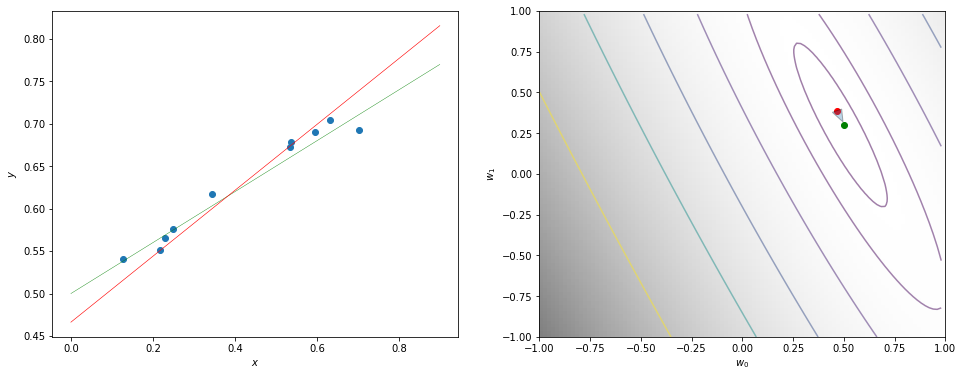

0.4681114950562958 0.38393234560202705


In [0]:
from IPython.display import clear_output
# initialise parameters randomly
w0 = numpy.random.normal()
w1 = numpy.random.normal()
print (w0, w1)

# step size (also known as learning rate)
eta = 0.01

for iteration in range(500):
    # calculate gradient
    gr = calculate_gradient_for_linear_model(x, y, [w0,w1])

    # take a step towards the *negative* gradient
    w0 = w0 - eta*gr[0]
    w1 = w1 - eta*gr[1]

    if iteration%10==0:
      print("Iteration %d error is %f" % (iteration, error_of_linear_model(x,y,[w0,w1])))
      clear_output(wait=True)
      pyplot.figure(figsize=(16,6))
      plot_data_and_gradient(x, y, w0, w1, eta)
      pyplot.show()

print (w0, w1) # final result

---
## Using automatic differentiation (AD) and optimisation routines
<font size=4>
In the example of fitting a line, we implemented our own optimisation routine:

* we calculated the gradient by hand

* we implemented a simple optimiser called gradient descent

While this is useful for understanding what is involved in fitting a model,
in everyday work we want use libraries to do this work for us:

* AD calculates the gradient for us

* optimisation libraries offer sophisticated and numerically robust optimisers


The package `autograd` offers functionality for calculating gradients automatically (other packages are available). We can now do this for our squared error function wrt to <font color=#bb0000>$w_0, w_1$</font>.


In [0]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # the only autograd function you may ever need

def compact_error_of_linear_model(param): # note that we omit x and y, as they are not changing parameters of the function
  return numpy.sum(numpy.square(linear_model(x, param[0], param[1])-y))
  
grad_f = grad(compact_error_of_linear_model)  # obtain its gradient function

print (grad_f([0.6,0.5]))
print (calculate_gradient_for_linear_model(x,y,[0.6, 0.5]))

[array(3.58534053), array(1.63698525)]
[3.58534053 1.63698525]


<font size=4>Let us calculate the gradient for the somewhat more complex example function <font color=#bb0000>$f(x,y)=((x+1)^2 + 2(y-1)^2)$</font> with respect to <font color=#bb0000>$x,y$</font>:

In [0]:
# Example adapted from https://github.com/HIPS/autograd

def f(p):                    # Define a function
  return (p[0]+1)**2 + 2*(p[1]-1)**2

grad_f = grad(f)             # Obtain its gradient function
grad_f([3.0,4.0])            # result should be [8; 12]

[array(8.), array(12.)]

<font size=4>The minimum value of our example function <font color=#bb0000>$f$</font> is <font color=#bb0000>$0$</font> attained at <font color=#bb0000>$(x,y)=(-1,1)$</font>

Let us find the minimum using `scipy.optimize.minimize` (other packages are available).


In [0]:
from scipy.optimize import minimize

# first argument is the function we want to minimise
# second argument is the starting point - here we start from a random pair of values
# the third argument is the optimiser - here we use conjugate gradient, a sophisticated method
# the fourth argument provides the gradient function, which we compute with automatic differentiation

minimize(f,np.random.rand(2),method='CG',jac=grad_f)

     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 3
    njev: 6
  status: 0
 success: True
       x: array([-1.,  1.])

<font size=4>In the next models we present, instead of doing things manually, we put these tools at work.

---
## Fitting a plane
<font size=4>

We saw how to fit a line for data where the input was <font color=#bb0000>$x\in R$</font>.
What if the input has more dimensions?
In this example, we work with data pairs <font color=#bb0000>$(x\in R^2, y \in R)$</font> where the input <font color=#bb0000>$x$</font> has two dimensions:

###Defining a model
<font size=4>

A plane is defined through:<br>

<font color=#bb0000>$f(\mathbf{x}) = w_2 x_2 + w_1x_1 + w_0$</font>

Let us use a more convenient notation that is common in machine learning:

<font color=#bb0000>$f(\mathbf{x}) = \mathbf{w}^T \mathbf{x},\quad where\ \mathbf{x}=\begin{bmatrix}
1\\
x_1\\
x_2
\end{bmatrix} \ and \ \mathbf{w}=\begin{bmatrix}
w_0\\
w_1\\
w_2
\end{bmatrix}$</font>

The plane model translates into the following code:

In [0]:
def plane_model(x, w):
  return numpy.dot(w.T, x)

<font size=2><center>
<table><tr><td>related information</td></tr>
<tr><td>

[https://en.wikipedia.org/wiki/Dot_product](https://en.wikipedia.org/wiki/Dot_product)

[https://en.wikipedia.org/wiki/Transpose](https://en.wikipedia.org/wiki/Transpose)

</td></tr></table>
</center></font>

###Generating synthetic data
<font size=4>
Let's generate some random data for <font color=#bb0000>$\mathbf{x}$</font> and <font color=#bb0000>$y$</font> using our plane model. Accordingly, we have to augment each input <font color=#bb0000>$\mathbf{x}_n$</font> with element <font color=#bb0000>$1.0$</font>:

In [0]:
n = 100
w = numpy.array([4.3, 2.5, 1.2])
x = numpy.random.uniform(size = (2,n)) # generate n 2d values between 0 and 1
x = numpy.concatenate((numpy.ones((1,n)), x), axis=0) # augument with 1
y = plane_model(x, w) + numpy.random.normal(loc=0.0, scale=0.1, size=x.shape[-1])

###Defining the error function and minimizing it with AD and gradient descent
<font size=4>How about the objective function to be minimised? Looks almost the same to the one used for fitting a line:

<font color=#bb0000>$e(\mathbf{w}) = \sum_{n=1}^N \|f(\mathbf{x}_n;\mathbf{w}) - y_n\|^2$</font>

The code for the objective function is **very** similar to the one for fitting a straight line:


In [0]:
def error_of_plane_model(x, y, w):
  return numpy.sum(numpy.square(plane_model(x, w)-y))

<font size=4>We calculate the gradient using AD:


In [0]:
# We use an anonymous function to convey that objective function
# to be optimised is solely a function of the free parameters w
error_of_plane = lambda w: error_of_plane_model(x, y, w)
grad_objective = grad(error_of_plane)

<font size=4>Now we call the optimiser:

In [0]:
result = minimize(error_of_plane, numpy.random.rand(3), method='CG', jac=grad_objective)
print (result.x, w, sep='\n')

[4.28337148 2.5186505  1.23064924]
[4.3 2.5 1.2]


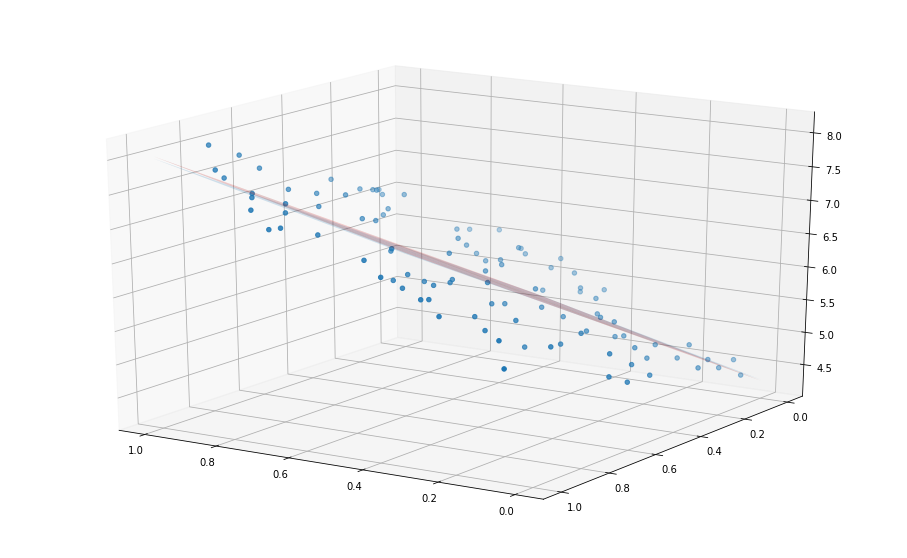

In [0]:
from mpl_toolkits.mplot3d import Axes3D
figure = pyplot.figure(figsize=(16,10))
ax = figure.add_subplot(111, projection='3d')
ax.scatter(x.T[:,1], x.T[:,2], y)

xx, yy = numpy.meshgrid(range(11), range(11))
z = numpy.array([plane_model([1,par[0],par[1]],w) for par in numpy.mgrid[0:1:11j, 0:1:11j].T.reshape(-1,2)]).reshape(11,11).T
ax.plot_surface(xx/10, yy/10, z, alpha=0.2)

xx, yy = numpy.meshgrid(range(11), range(11))
z = numpy.array([plane_model([1,par[0],par[1]],result.x) for par in numpy.mgrid[0:1:11j, 0:1:11j].T.reshape(-1,2)]).reshape(11,11).T
ax.plot_surface(xx/10, yy/10, z, alpha=0.2, color='r')
ax.view_init(20, 123)
pyplot.show()

---
## Fitting a polynomial
<font size=4>
We know now how to fit lines and (hyper-) planes. What if our problem is non-linear? Instead of a straight line, we can fit a curve, for instance a polynomial.

###Defining a model
<font size=4>
The polynomial model is given by:

<font color=#bb0000>$f(x) = w_3 x^3 + w_2 x^2 + w_1 x + w_0$</font>

Or equivalently, using our convenient notation as before:

<font color=#bb0000>$f(x) = \mathbf{w}^T h(x),\quad where\ h(x)=\begin{bmatrix}
1\\
x\\
x^2\\
x^3
\end{bmatrix} \ and \ \mathbf{w}=\begin{bmatrix}
w_0\\
w_1\\
w_2\\
w_3
\end{bmatrix}$
</font>

The vector <font color=#bb0000>$h(x)$</font> is called a basis function. Here we use a polynomial basis. 

The basis model as well as the polynomial model is expressed in ``python`` as:

In [0]:
def h(x):
  return numpy.array([numpy.ones(x.shape), x, x*x, x*x*x])

def polynomial_model(x, w):
  return numpy.dot(w.T, h(x))

<font size=4>Notice that the expression and code read the same as for line and plane examples.
This is **no** coincidence.

The polynomial model, although it is solving a non-linear regression task,
is still linear in the sense that the parameters interact linearly with the data, the basis <font color=#bb0000>${h}(x)$</font>.


###Generating synthetic data
<font size=4>
Let's randomly generate some data of pairs <font color=#bb0000>$(x\in R,y\in R)$</font> using our polynomial model:

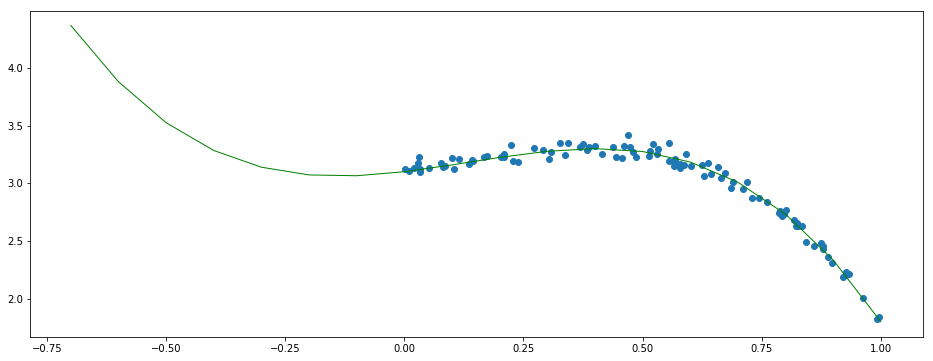

In [0]:
n = 100

w = numpy.array([3.1, 0.5, 1.2, -3])
x = numpy.random.uniform(size = (n)) # generate n values between 0 and 1
y = polynomial_model(x, w) + numpy.random.normal(loc=0.0, scale=0.04, size=x.shape[-1]) # add some noise

xvals = numpy.arange (-0.7,1.1,0.1)
pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, polynomial_model(xvals, w), c='g', lw=1.0)
pyplot.scatter(x,y)
pyplot.show()

###Defining the error function and minimizing it with AD and gradient based optimisation
<font size=4>How about the objective function to be minimised? It's the **same** as for fitting a plane; the squared error:

<font color=#bb0000>$e(\mathbf{w}) = \sum_{n=1}^N \|f(\mathbf{x}_n;\mathbf{w}) - y_n\|^2$</font>

The code is very similar and reads:

In [0]:
def error_of_polynomial_model(x, y, w):
  return numpy.sum(numpy.square(polynomial_model(x, w)-y))

<font size=4>We now can calculate the gradient, use the optimizer and visualize the results:

[ 3.11933653  0.4891689   1.03927327 -2.84451658]
[ 3.1  0.5  1.2 -3. ]


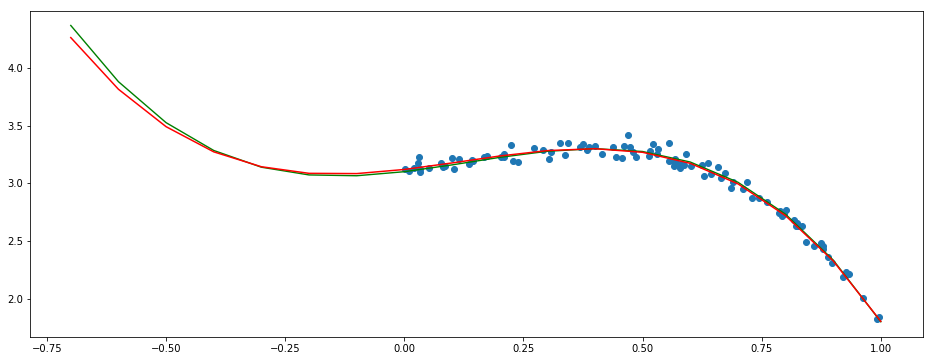

In [0]:
error_of_polynomial = lambda w: error_of_polynomial_model(x, y, w)
grad_objective = grad(error_of_polynomial)
result = minimize(error_of_polynomial, numpy.random.rand(4), method='CG', jac=grad_objective)
print (result.x, w, sep='\n')

pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, polynomial_model(xvals, w), c='g', lw=1.4)
pyplot.plot(xvals, polynomial_model(xvals, result.x), c='r', lw=1.5)
pyplot.scatter(x,y)
pyplot.show()

---
##Adaptive basis
<font size=4>
In the previous example we used a fixed basis (polynomial basis) <font color=#bb0000>$h(x) = [1, x, x^2, x^3]$</font>. A specific basis might be good for a particular problem. But how can we adapt the basis to the problem at hand?

###Defining a model
<font size=4>

We can achieve this by making <font color=#bb0000>$h$</font> a parametric (i.e. adaptable) function <font color=#bb0000>$h(\mathbf{x}; \mathbf{v}, \mathbf{b})$</font> with parameters <font color=#bb0000>$\mathbf{v}$</font> and <font color=#bb0000>$\mathbf{b}$</font>.<br><br>

Basis function <font color=#bb0000>$h$</font> calculates the vector:

<font color=#bb0000>$h(\mathbf{x}; \mathbf{v}, \mathbf{b}) = \begin{bmatrix} 1, \tanh( \mathbf{v}_1^T \mathbf{x} + \mathbf{b}_1), \dots, \tanh( \mathbf{v}_M^T \mathbf{x} + \mathbf{b}_M) \end{bmatrix}$</font>,

where <font color=#bb0000>$\mathbf{v}_m$</font> is the <font color=#bb0000>$m$</font>-th row of matrix <font color=#bb0000>$\mathbf{v}$</font> and <font color=#bb0000>$\mathbf{b}_m$</font> is the <font color=#bb0000>$m$</font>-th element of <font color=#bb0000>$\mathbf{b}$</font>.
This can be compactly written as:

<font color=#bb0000>$h(\mathbf{x}; \mathbf{v},\mathbf{b}) = \begin{bmatrix} 1, \tanh.(\mathbf{v}^T \mathbf{x} + \mathbf{b})\end{bmatrix}$</font>,

if we use the convention that <font color=#bb0000>$\tanh.(\cdot)$</font> is the elementwise application of the ``tanh`` function.

<font size=4>
We now consider the dimensions of the parameters. If the input is <font color=#bb0000>$\mathbf{x}\in R^{D}$</font>, then we need <font color=#bb0000>$\mathbf{v}\in R^{M\times D}$</font>, i.e. a matrix, so that <font color=#bb0000>$\mathbf{v}^T \mathbf{x} \in R^M$</font>. Consequently (in order to make the dimensions match), we want <font color=#bb0000>$\mathbf{b}\in R^{M}$</font>. <font color=#bb0000>$M$</font> is a constant of our choice whose meaning will become apparent later on. For the moment we arbitrarily set <font color=#bb0000>$M=3$</font> and we will see how to interpret this value soon.


We code the adaptive basis as:


In [0]:
def h(x, v, b):
  return np.concatenate((np.ones((1,x.shape[1])),
                            np.tanh(np.dot(v.T, x) + b)))

<font size=4>
We now contrast the parametric basis function <font color=#bb0000>$h$</font> to the polynomial calculated earlier:

adaptive <font color=#bb0000>$h(\mathbf{x}; \mathbf{v}, \mathbf{b}) =
\begin{bmatrix}
1 \\
\tanh( \mathbf{v}_1^T \mathbf{x} + b_1) \\
\tanh( \mathbf{v}_2^T \mathbf{x} + b_2) \\
\tanh( \mathbf{v}_3^T \mathbf{x} + b_3) \\
\end{bmatrix}$</font>
and polynomial
<font color=#bb0000>$h(x) = \begin{bmatrix} 1 \\ x \\x^2 \\ x^3 \end{bmatrix}$</font>

Hence, we can understand <font color=#bb0000>$h(\mathbf{x}; \mathbf{v}, \mathbf{b})$</font> as calculating a vector of elements that are nonlinear versions of input <font color=#bb0000>$\mathbf{x}_n$</font>.<br><br>


The adaptive model reads
<font color=#bb0000>$f(\mathbf{x}) = \mathbf{w}^T h(\mathbf{x}; \mathbf{v}, \mathbf{b})$</font>. Note that the dimension of <font color=#bb0000>$\mathbf{w}$</font> is <font color=#bb0000>$M+1$</font>.<br><br>

The code for the adaptive model reads:

In [0]:
def adaptive_model(x, v, b, w):
  return np.dot(w.T, h(x, v, b))

###Generating synthetic data
<font size=4>
Let's generate some random data for <font color=#bb0000>$x\in R$</font> and <font color=#bb0000>$y\in R$</font> by using the normalized sinus cardinalis <font color=#bb0000>$sinc(x) = \frac{sin(\pi x)}{\pi x}$</font> as an example function that we would like to estimate from observed data pairs:

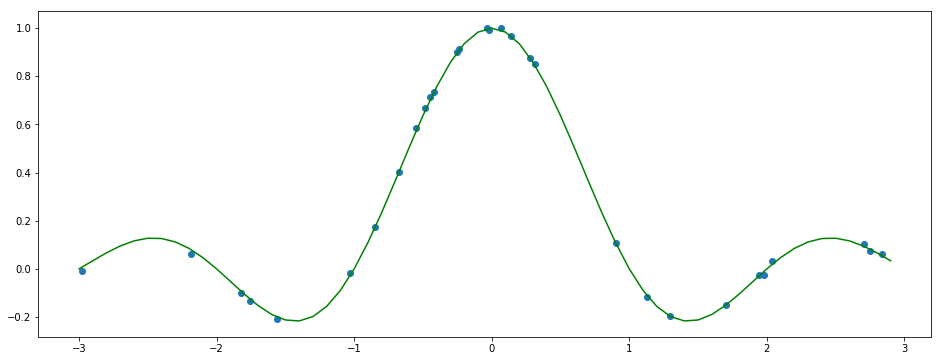

In [0]:
n = 30
x = numpy.random.uniform(low=-3, high=3, size=n).reshape(1,-1)
y = numpy.sinc(x) + numpy.random.normal(scale=0.01, size=x.shape)

xvals = numpy.arange (-3,3,0.1)
pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, numpy.sinc(xvals), c='g', lw=1.5)
pyplot.scatter(x,y)
pyplot.show()

###Defining the error function and minimizing it with AD and gradient descent
<font size=4>How about the objective function to be minimised? It's very similar to the squared error functions used above:

<font color=#bb0000>$e(\mathbf{v},\mathbf{w},\mathbf{b}) = \sum_{n=1}^N \|f(\mathbf{x}_n;\mathbf{v},\mathbf{w},\mathbf{b}) - y_n\|^2$</font>

In this experiment <font color=#bb0000>$x\in R^1$</font> therefore  <font color=#bb0000>$D=1$</font> and we defined <font color=#bb0000>$M=3$</font>.
To deal with all the parameters, a helper function to unpack <font color=#bb0000>$\mathbf{v},\mathbf{w},\mathbf{b}$</font> is declared. The code of the error function is very similar and reads:

In [0]:
D = 1
M = 4

In [0]:
def extract_parameter(param):
  v = param[:D*M].reshape(M, D).T
  b = param[D*M:D*M+M].reshape(M, 1)
  w = param[D*M+M:].reshape(M+1, 1) # note the +1 for the bias
  return v, b, w

def error_of_adaptive_model(x, y, param):
  v, b, w = extract_parameter(param)
  return np.sum(np.square(adaptive_model(x, v, b, w)-y))

<font size=4>We now can calculate the gradient, use the optimizer and visualize the results:

[ 0.71562545 -2.08895054 -1.43990963 -1.05381086  0.48260042  3.4291544
 -2.36265623  0.56155322 -0.04828227  3.4725811  -0.45207541  1.33008996
  2.44942315]


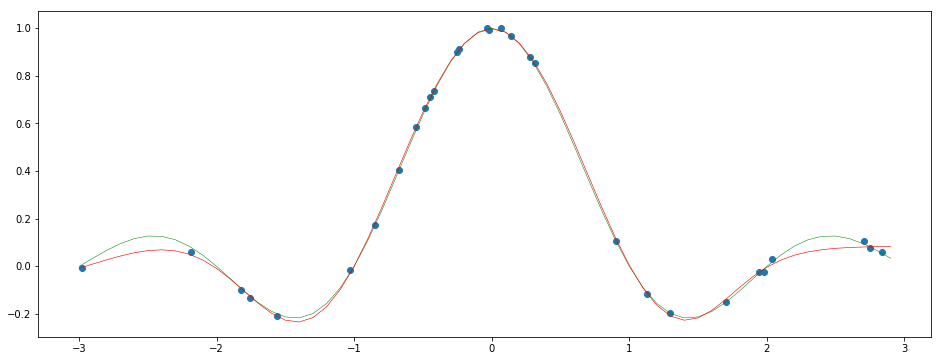

In [0]:
error_of_adaptive = lambda param: error_of_adaptive_model(x, y, param)
grad_objective = grad(error_of_adaptive)
result = minimize(error_of_adaptive, numpy.random.rand(M*D+M+M+1), method='CG', jac=grad_objective) # note the +1 for bias
print (result.x)

xvals = numpy.arange (-3,3,0.1).reshape(-1,1)
v, b, w = extract_parameter(result.x)
pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, numpy.sinc(xvals), c='g', lw=0.5)
pyplot.plot(xvals, adaptive_model(xvals.T, v, b, w).T, c='r', lw=0.6)
pyplot.scatter(x,y)
pyplot.show()

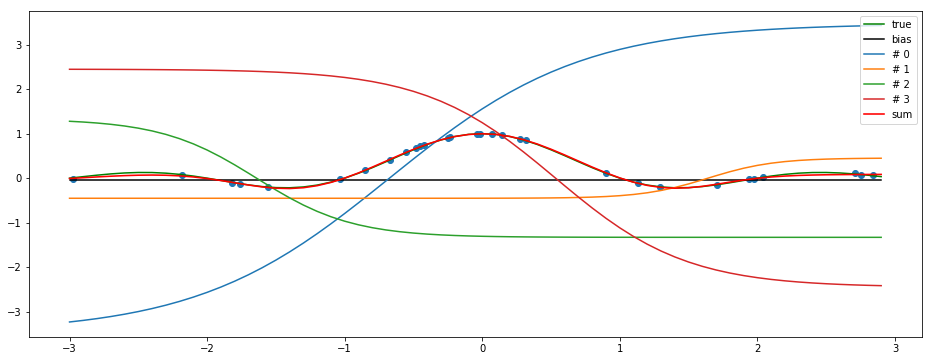

In [0]:
v, b, w = extract_parameter(result.x)
pyplot.figure(figsize=(16,6))
pyplot.plot(xvals, numpy.sinc(xvals), c='g', lw=1.5, label="true")
pyplot.plot(xvals,w[0]*np.ones(xvals.shape), lw=1.5, c='k', label="bias")
for i in range(M):
  pyplot.plot(xvals, w[i+1]*h(xvals.T, v.T[i].reshape(1,1),b[i].reshape(1,1))[1:].T, lw=1.5, label="# "+str(i))
pyplot.plot(xvals, adaptive_model(xvals.T, v, b, w).T, c='r', lw=1.6, label="sum")
pyplot.legend()
pyplot.scatter(x,y)
pyplot.show()

<font size=4>

As we can see, <font color=#bb0000>$M$</font> defines the number of basis functions.
<font size=6><center>

[PART B](https://colab.research.google.com/drive/1hIaFKr5At02wUaFHNQpDn0HuhaIE-F6s)